<a href="https://colab.research.google.com/github/jemaldonado/Desafion-Neuron/blob/master/HEART%20ATTACK/HERT_ATTACK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## Importação das Bibliotecas

In [ ]:
#!pip install catboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
# Seaborn visualization library
import seaborn as sns
#from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
#from catboost import CatBoostClassifier

np.random.seed(1234)

In [ ]:
%%html
<img src='https://www.canwelivebetter.bayer.com/sites/default/files/2018-05/NEW_Heartbeat_looping_GIF_NORMAL_0.gif' width=600/>

## Importação dos arquivos/dataset

In [ ]:
train = pd.read_excel('https://github.com/jemaldonado/Desafion-Neuron/blob/master/HEART%20ATTACK/heart_train.xlsx?raw=true')
test = pd.read_excel('https://github.com/jemaldonado/Desafion-Neuron/blob/master/HEART%20ATTACK/heart_test%20(1).xlsx?raw=true')

Sugestões:

Análise Descritiva das Variáveis.

Análise de relação entre variáveis.
Visualização das análises.

Regressão logística.

Objetivo:

Criar modelo de regressão logística para classificação de forma a maximizar o “Score F1” no conjunto de teste.

In [ ]:
train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,40,1,0,110,167,0,0,114,1,2.0,1,0,3,0
1,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0
2,41,0,1,126,306,0,1,163,0,0.0,2,0,2,1
3,37,0,2,120,215,0,1,170,0,0.0,2,0,2,1
4,62,1,0,120,267,0,1,99,1,1.8,1,2,3,0


In [ ]:
test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,77,1,0,125,304,0,0,162,1,0.0,2,3,2
1,55,1,0,160,289,0,0,145,1,0.8,1,1,3
2,70,1,2,160,269,0,1,112,1,2.9,1,1,3
3,64,0,2,140,313,0,1,133,0,0.2,2,0,3
4,53,0,2,128,216,0,0,115,0,0.0,2,0,0


In [ ]:
train.shape

(208, 14)

In [ ]:
test.shape

(98, 13)

## Análise descritiva das variáveis


In [ ]:
train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,208.000000,208.000000,208.000000,208.000000,208.00000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,53.802885,0.677885,0.995192,131.634615,248.56250,0.134615,0.538462,149.326923,0.326923,0.979808,1.427885,0.697115,2.307692,0.538462
std,9.346502,0.468414,1.028566,17.050115,54.97743,0.342136,0.527927,23.141423,0.470221,1.055822,0.593517,1.026034,0.582796,0.499721
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,46.000000,0.000000,0.000000,120.000000,212.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.500000,1.000000,1.000000,130.000000,241.50000,0.000000,1.000000,152.000000,0.000000,0.650000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,180.000000,564.00000,1.000000,2.000000,202.000000,1.000000,4.400000,2.000000,4.000000,3.000000,1.000000


In [ ]:
train.count()

age         208
sex         208
cp          208
trestbps    208
chol        208
fbs         208
restecg     208
thalach     208
exang       208
oldpeak     208
slope       208
ca          208
thal        208
target      208
dtype: int64

In [ ]:
train.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
train['target'].value_counts()

1    112
0     96
Name: target, dtype: int64

### Quais as caracteristicas mais importantes?

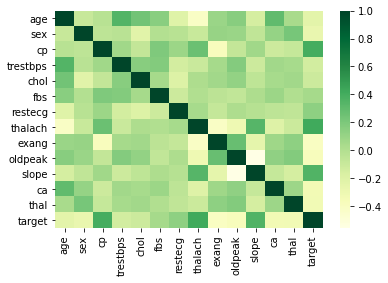

In [ ]:
sns.heatmap(train.corr(),cmap="YlGn")

In [ ]:
df_corr_pearson = pd.DataFrame (train.corr(method ='pearson')['target'])
df_corr_pearson.sort_values('target',ascending=False)

# thalach: maximum heart rate achieved /frequência cardíaca máxima atingir
# exang: exercise induced angina/ angina induzida pelo exercício (1 = yes; 0 = no)
# oldpeak = ST depression induced by exercise relative to rest/ ST depressão induzida pelo exercício em relação ao repouso
# slope: the slope of the peak exercise ST segment/ declive: o declive do segmento ST do pico do exercício
  #-- Valor 1: linha ascendente
  #-- Valor 2: plano
  #-- Valor 3: Redução da velocidade
# cp: chest pain type/dor no peito (4 values)
  #-- Value 1: typical angina
  #-- Value 2: atypical angina
  #-- Value 3: non-anginal pain
  #-- Value 4: asymptomatic


,target
target,1.000000
thalach,0.421248
cp,0.399808
slope,0.359590
restecg,0.140859
fbs,0.054338
chol,-0.112538
trestbps,-0.134420
age,-0.230573
sex,-0.266709


### Correlação
Coeficiente de Correlação de Pearson
O coeficiente de correlação de Pearson (r), também chamado de correlação linear ou r de Pearson, é um grau de relação entre duas variáveis quantitativas e exprime o grau de correlação através de valores situados entre -1 e 1.

Quando  o coeficiente de correlação se aproxima de 1, nota-se um aumento no valor de uma variável quando a outra também aumenta, ou seja, há uma relação linear positiva. Quando o coeficiente se aproxima de -1, também é possível dizer que as variáveis são correlacionadas, mas nesse caso quando o valor de uma variável aumenta o da outra diminui. Isso é o que é chamado de correlação negativa ou inversa.

Um coeficiente de correlação próximo de zero indica que não há relação entre as duas variáveis, e quanto mais eles se aproximam de 1 ou  -1, mais forte é a relação.


In [ ]:
%%html
<img src='https://i0.wp.com/www.abgconsultoria.com.br/blog/wp-content/uploads/img2-2.png?w=1500' width=600/>

## Pre Processamento

In [ ]:
#feat_train = train[['thalach','cp','slope','oldpeak','exang']]
#feat_train = train[['thalach','cp','slope','restecg','fbs','chol','trestbps','age','sex','thal','ca','oldpeak','exang']]
# corte acima de 0.20 / -0.20
feat_train = train[['thalach','cp','slope','age','sex','thal','ca','oldpeak','exang']]

In [ ]:
feat_train

,thalach,cp,slope,age,sex,thal,ca,oldpeak,exang
0,114,0,1,40,1,3,0,2.0,1
1,112,0,1,57,1,1,1,0.6,1
2,163,1,2,41,0,2,0,0.0,0
3,170,2,2,37,0,2,0,0.0,0
4,99,0,1,62,1,3,2,1.8,1
...,...,...,...,...,...,...,...,...,...
203,111,0,2,58,1,3,0,0.8,1
204,171,0,2,58,1,3,2,0.0,0
205,162,0,2,77,1,2,3,0.0,1
206,145,0,1,55,1,3,1,0.8,1


## Criação do Modelo


In [ ]:
modelo = LogisticRegression(random_state=42, solver='liblinear', penalty= 'l2')

#modelo = CatBoostClassifier()

###Cross Validation

Iremos utilizar o Cross Validation para avaliar se o modelo tem performance com diferentes partes do dataset, um vez que o modelo tem poucos dados pode ocasionar de os dados de treino e validações contenham conjuntos parecidos

In [ ]:
scores = cross_val_score(modelo, feat_train, train['target'], cv=5, scoring='f1')

In [ ]:
print(scores)
print(scores.mean())

[0.81 0.86 0.84 0.87 0.86]
0.8488914634729511


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(feat_train, train['target'], test_size=0.30, random_state=42)

In [ ]:
print(X_train.shape)
print(X_valid.shape)

(145, 9)
(63, 9)


In [ ]:
modelo.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### Avaliação do Modelo

In [ ]:
y_pred = modelo.predict(X_valid)

In [ ]:
y_pred

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

#### Resultado

In [ ]:
print('F1 score:', f1_score(y_valid,y_pred))

F1 score: 0.8735632183908046


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.64      0.72        22
           1       0.83      0.93      0.87        41

    accuracy                           0.83        63
   macro avg       0.82      0.78      0.80        63
weighted avg       0.83      0.83      0.82        63



In [ ]:
##### QUAIS SAO OS ERROS?
print(y_valid.shape)
print(y_pred.shape)

analise_resultado = pd.DataFrame()
analise_resultado['verdadeiro'] = y_valid 
analise_resultado['predito']    = y_pred

analise_resultado['verdadeiro'].value_counts()

(63,)
(63,)


1    41
0    22
Name: verdadeiro, dtype: int64

#### Matriz de Confusão

O que são matrizes de confusão?

É um tabela que mostra as frequências de classificação para cada classe do modelo. Pegando o exemplo acima, ela vai nos mostrar as frequências:

Verdadeiro positivo (true positive — TP): ocorre quando no conjunto real, a classe que estamos buscando foi prevista corretamente. Por exemplo, quando a mulher está grávida e o modelo previu corretamente que ela está grávida.

Falso positivo (false positive — FP): ocorre quando no conjunto real, a classe que estamos buscando prever foi prevista incorretamente. Exemplo: a mulher não está grávida, mas o modelo disse que ela está.

Falso verdadeiro (true negative — TN): ocorre quando no conjunto real, a classe que não estamos buscando prever foi prevista corretamente. Exemplo: a mulher não estava grávida, e o modelo previu corretamente que ela não está.

Falso negativo (false negative — FN): ocorre quando no conjunto real, a classe que não estamos buscando prever foi prevista incorretamente. Por exemplo, quando a mulher está grávida e o modelo previu incorretamente que ela não está grávida.

Referência : https://medium.com/data-hackers/entendendo-o-que-%C3%A9-matriz-de-confus%C3%A3o-com-python-114e683ec509

In [ ]:
%%html
<img src='https://miro.medium.com/max/327/1*Glcsi60bv6wqGKN7ozDu3Q.png' />

Confusion matrix, without normalization
[[14  8]
 [ 3 38]]
Normalized confusion matrix
[[0.64 0.36]
 [0.07 0.93]]


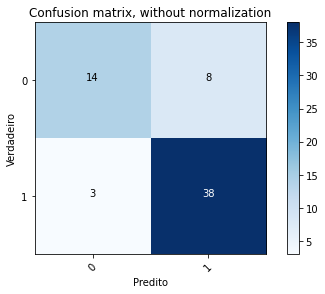

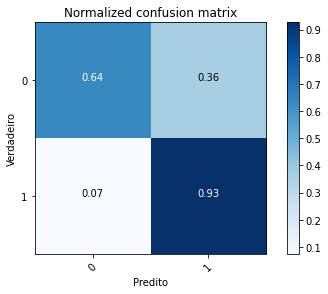

In [ ]:
from sklearn import metrics
import itertools  

class_names = ['0', '1']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Verdadeiro')
    plt.xlabel('Predito')


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_valid,y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                  title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                  title='Normalized confusion matrix')

plt.show()

#### Curva ROC

ROC
A curva ROC mostra o quão bom o modelo criado pode distinguir entre duas coisas (já que é utilizado para classificação). Essas duas coisas podem ser 0 ou 1, ou positivo e negativo. Os melhores modelos conseguem distinguir com precisão o binômio.

O ROC possui dois parâmetros:
Taxa de verdadeiro positivo (True Positive Rate), que é dado por true positives / (true positives + false negatives)

Taxa de falso positivo (False Positive Rate), que é dado por false positives / (false positives + true negatives)

Uma curva ROC traça “True Positive Rate vs. False Positive Rate” em diferentes limiares de classificação.

Assim, na tentativa de simplificar a análise da ROC, a AUC (“area under the ROC curve”) nada mais é que uma maneira de resumir a curva ROC em um único valor, agregando todos os limiares da ROC, calculando a “área sob a curva”.
AUC
O valor do AUC varia de 0,0 até 1,0 e o limiar entre a classe é 0,5. Ou seja, acima desse limite, o algoritmo classifica em uma classe e abaixo na outra classe.
Quanto maior o AUC, melhor.



In [ ]:
%%html
<img src='https://miro.medium.com/max/700/1*RqK5DjVxcj4qZsCdN4FOSQ.png' />

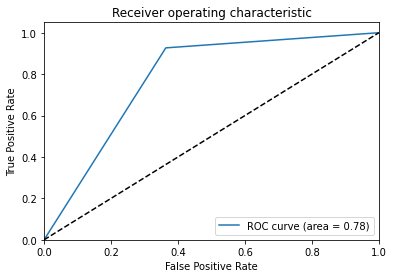

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
fpr, tpr, _ = roc_curve(y_valid, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Balanceamento das Classes


In [ ]:
from imblearn.over_sampling import SMOTE

X = feat_train
y = train['target']

smt = SMOTE()
X, y = smt.fit_sample(X, y)
np.bincount(y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


array([112, 112])

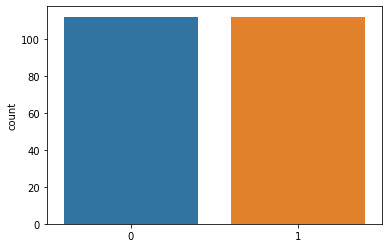

In [ ]:
ax = sns.countplot(x=y)

In [ ]:
modelo_balanceado = LogisticRegression(random_state=42, solver='liblinear', penalty= 'l2')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=0.30)

modelo_balanceado.fit(X_train, y_train)
y_pred = modelo_balanceado.predict(X_test)
accuracy_score(y_test, y_pred)

0.8382352941176471

In [ ]:
print(classification_report(y_test, y_pred))
print('F1 score:', f1_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        28
           1       0.85      0.88      0.86        40

    accuracy                           0.84        68
   macro avg       0.83      0.83      0.83        68
weighted avg       0.84      0.84      0.84        68

F1 score: 0.8641975308641976


In [ ]:
print(pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0   1  All
Real                
0        22   6   28
1         5  35   40
All      27  41   68


In [ ]:
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.2f' % auc)

AUC: 0.83


Tunning

In [ ]:
#from sklearn.model_selection import GridSearchCV

#param_grid = {
            
#    'penalty' : ['l1', 'l2'],
   # 'C' : np.logspace(-1, 4, 20,35),
#    'solver' : ['liblinear'] 
#}

# Create grid search object
#clf = GridSearchCV(lr, param_grid = param_grid, scoring = 'f1', cv = 5)  

# Fit on data
#clf.fit(X_train, y_train)

#pd.DataFrame(clf.cv_results_)[['params','rank_test_score','mean_test_score']]

#print(clf.best_params_)
#print(clf.best_score_)

## Submissão

Nessa seção será realizada a exportação do arquivo com as predições do dataset de teste

### Pre processamento

In [ ]:
#test_feat = test[['thalach','cp','slope','oldpeak','exang']]
test_feat = test[['thalach','cp','slope','age','sex','thal','ca','oldpeak','exang']]

In [ ]:
test_feat.head()

,thalach,cp,slope,age,sex,thal,ca,oldpeak,exang
0,162,0,2,77,1,2,3,0.0,1
1,145,0,1,55,1,3,1,0.8,1
2,112,2,1,70,1,3,1,2.9,1
3,133,2,2,64,0,3,0,0.2,0
4,115,2,2,53,0,0,0,0.0,0


### Aplicação do Modelo nos dados de teste

In [ ]:
y_pred_test = modelo_balanceado.predict(test_feat)

In [ ]:
y_pred_test.shape

(98,)

In [ ]:
df_resposta = pd.DataFrame()
df_resposta['target'] = y_pred_test

In [ ]:
df_resposta.head()

,target
0,0
1,0
2,0
3,1
4,1


### Exportação do Arquivo

In [ ]:
from google.colab import files
df_resposta.to_csv('HERT-ATTACK-FINAL.csv', index=False) 
files.download('HERT-ATTACK-FINAL.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
### tentar get dummies em CP, , SLOPE, CA  e THAL